In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
class k_means:
    def __init__(self):
        self.std_sq_err = None
        self.accuracy_score = None  
        self.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
        self.data = pd.read_csv('iris.data',names=self.columns)# reading data
        self.dict_data = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica': 2}
        self.label = []    
            
        for item in self.data['class']:
            self.label.append(self.dict_data[item])
    
        self.label=np.asarray(self.label)
        self.data = self.data.drop("class", axis=1)
        self.train_data = self.data.values


    def get_centroids(self, data, k):
        np.random.seed(8)
        centroids_idx = np.random.choice(data.shape[0], k, replace=False)
        centroids = data[centroids_idx]
        return centroids


    def get_std_sq_error(self, data, labels, centroids, clusters):
        dist = np.zeros(data.shape[0])
        for i in range(clusters):
            dist[labels == i] = np.sqrt(np.sum(np.square(data[labels == i] - centroids[i]), axis=1))
        return np.sum(np.square(dist))


    def prediction(self, data, centroids):
        distances = np.zeros([len(data), len(centroids)])
        distances = np.sqrt(np.sum(np.square(data[:, np.newaxis, :] - centroids), axis=2))
        labels = np.argmin(distances, axis=1)
        return labels

    
    def cosine_function(self,a,b):
        return distance.cosine(a,b)

    
    def euclidean_function(self,datapoint,cent):
        return sqrt(np.sum((datapoint-cent)*(datapoint-cent)))

    
    def minkowski_function(self,a,b):
        return distance.minkowski(a, b, 6)

    
    def manhattan_function(self,point1, point2):
        return np.sum(np.absolute(point1 - point2))

    def kmeans_calc(self, data, clusters=3, metric='euclidean', iterations=20):
        r, c = data.shape
        global std_sq_err
        global accuracy_score
        old_centroids = self.get_centroids(data, clusters)
        groups = {}

        for _ in range(iterations):
            distance = np.zeros([r, clusters])

            for i in range(r):
                if metric == 'euclidean':
                    distance[i] = [self.euclidean_function(data[i], centroid) for centroid in old_centroids]
                elif metric == 'manhattan':
                    distance[i] = [self.manhattan_function(data[i], centroid) for centroid in old_centroids]
                elif metric == 'minkowski':
                    distance[i] = [self.minkowski_function(data[i], centroid) for centroid in old_centroids]
                elif metric == 'cosine':
                    distance[i] = [self.cosine_function(data[i], centroid) for centroid in old_centroids]

                classes = np.argmin(distance, axis=1)

            new_centroids = [np.mean(data[classes == i], axis=0) for i in range(clusters)]
            old_centroids = new_centroids.copy()

        targets = self.prediction(data, old_centroids)
        accuracy_score = self.calculate_accuracy(targets)
        std_sq_err = self.get_std_sq_error(data, targets, old_centroids, clusters)



    def calculate_accuracy(self, t):
        count = np.sum(t == self.label)
        return count / len(t)




In [3]:
kmeans = k_means()

kmeans.kmeans_calc(kmeans.train_data, 3, 'euclidean')
print('Accuracy: {:.2%} (Euclidean distance) | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data, 3, 'minkowski')
print('Accuracy: {:.2%} (Minkowski distance) | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data, 3, 'cosine')
print('Accuracy: {:.2%} (Cosine distance) | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))



Accuracy: 88.67% (Euclidean distance) | Standard Squared Error: 78.94506582597731
Accuracy: 49.33% (Minkowski distance) | Standard Squared Error: 149.97298769989933
Accuracy: 47.33% (Cosine distance) | Standard Squared Error: 147.1743722215221


In [4]:
kmeans.kmeans_calc(kmeans.train_data[:, [0, 1]], 3, 'euclidean')
print('Accuracy (Sepal Length and Sepal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [0, 2]], 3, 'euclidean')
print('Accuracy (Sepal Length and Petal Length): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [0, 3]], 3, 'euclidean')
print('Accuracy (Sepal Length and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [1, 2]], 3, 'euclidean')
print('Accuracy (Sepal Width and Petal Length): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [1, 3]], 3, 'euclidean')
print('Accuracy (Sepal Width and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))



Accuracy (Sepal Length and Sepal Width): 82.00% | Standard Squared Error: 37.12370212765958
Accuracy (Sepal Length and Petal Length): 88.00% | Standard Squared Error: 53.80135119312653
Accuracy (Sepal Length and Petal Width): 26.67% | Standard Squared Error: 32.778832054560965
Accuracy (Sepal Width and Petal Length): 42.67% | Standard Squared Error: 81.72490909090908
Accuracy (Sepal Width and Petal Width): 43.33% | Standard Squared Error: 32.168952380952376


In [5]:
kmeans.kmeans_calc(kmeans.train_data[:, [2, 3]], 3, 'euclidean')
print('Accuracy (Petal Length and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [0, 1, 3]], 3, 'euclidean')
print('Accuracy (Sepal Length, Sepal Width, and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [0, 1, 2]], 3, 'euclidean')
print('Accuracy (Sepal Length, Sepal Width, and Petal Length): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [0, 2, 3]], 3, 'euclidean')
print('Accuracy (Sepal Length, Petal Length, and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))

kmeans.kmeans_calc(kmeans.train_data[:, [1, 2, 3]], 3, 'euclidean')
print('Accuracy (Sepal Width, Petal Length, and Petal Width): {:.2%} | Standard Squared Error: {}'.format(accuracy_score , std_sq_err))


Accuracy (Petal Length and Petal Width): 37.33% | Standard Squared Error: 31.387758974358974
Accuracy (Sepal Length, Sepal Width, and Petal Width): 82.67% | Standard Squared Error: 48.752784541062795
Accuracy (Sepal Length, Sepal Width, and Petal Length): 88.00% | Standard Squared Error: 69.50013924466339
Accuracy (Sepal Length, Petal Length, and Petal Width): 90.67% | Standard Squared Error: 63.50051666666667
Accuracy (Sepal Width, Petal Length, and Petal Width): 42.67% | Standard Squared Error: 100.53040404040404


In [6]:
num_clusters_list = list(range(1, 11))
std_sq_err_list = []
accuracy_list = []
print("Accuracy and Standard Squared Error for Different Number of Clusters")
for num_clusters in num_clusters_list:
    kmeans.kmeans_calc(kmeans.train_data, num_clusters, 'euclidean')
    std_sq_err_list.append(std_sq_err)
    accuracy_list.append(accuracy_score)
    print('For {} clusters: Accuracy: {:.2%} | Standard Squared Error: {}'.format(num_clusters, accuracy_score, std_sq_err))


Accuracy and Standard Squared Error for Different Number of Clusters
For 1 clusters: Accuracy: 33.33% | Standard Squared Error: 680.8244
For 2 clusters: Accuracy: 64.67% | Standard Squared Error: 152.36870647733906
For 3 clusters: Accuracy: 88.67% | Standard Squared Error: 78.94506582597731
For 4 clusters: Accuracy: 53.33% | Standard Squared Error: 71.66131466733202
For 5 clusters: Accuracy: 12.67% | Standard Squared Error: 69.4223262664519
For 6 clusters: Accuracy: 30.67% | Standard Squared Error: 47.66450931571816
For 7 clusters: Accuracy: 13.33% | Standard Squared Error: 46.88013557834442
For 8 clusters: Accuracy: 13.33% | Standard Squared Error: 36.07030831390831
For 9 clusters: Accuracy: 13.33% | Standard Squared Error: 31.439330808080815
For 10 clusters: Accuracy: 13.33% | Standard Squared Error: 27.09491414141415


Text(0, 0.5, 'accuracy')

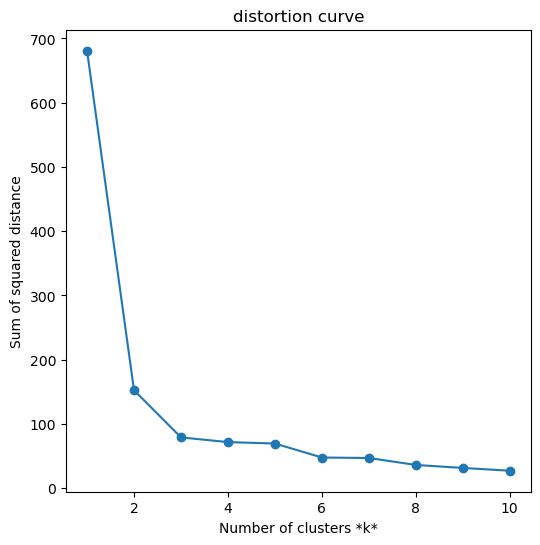

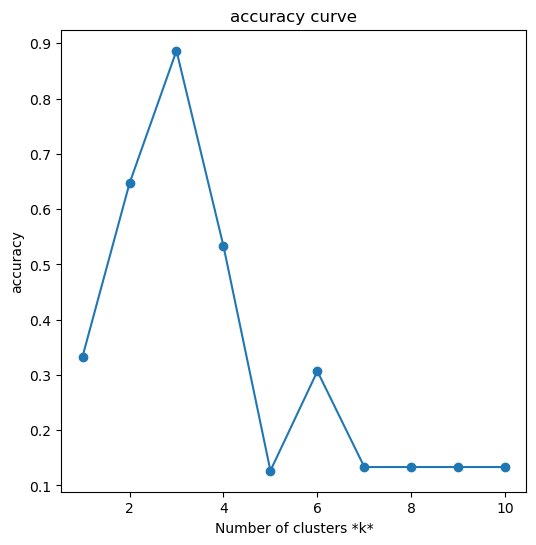

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(num_clusters_list, std_sq_err_list, '-o')

plt.title('distortion curve')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

plt.figure(figsize=(6, 6))
plt.plot(num_clusters_list, accuracy_list, '-o')

plt.title('accuracy curve')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('accuracy')